# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Python/INNHotelsGroup.csv')

## Data Overview



In [6]:
print('There are ', data.shape[0], 'rows and ', data.shape[1], 'columns')

There are  36275 rows and  19 columns


In [7]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.680,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.500,0,Canceled


In [8]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.800,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.950,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.390,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.500,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.670,0,Not_Canceled


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Data seems to be complete so no missing data treatment is needed. However we have some colums of object type that we will treat, such as columns that need to be encoded. We have 4 object type columns and the rest are numerical, we might need to transfor those later and drop some.

In [10]:
data.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


We have no missing values, so we won't need to handle that.

In [11]:
data.duplicated().sum()

0

There are no duplicated values so we can proceed.

In [12]:
#creating a copy to keep the original dataset.
df = data.copy()

In [13]:
#Droping the Booking ID column since this is irrelevant for our model
df.drop('Booking_ID', axis=1, inplace=True)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.000,1.845,0.519,0.000,2.000,2.000,2.000,4.000
no_of_children,36275.000,0.105,0.403,0.000,0.000,0.000,0.000,10.000
no_of_weekend_nights,36275.000,0.811,0.871,0.000,0.000,1.000,2.000,7.000
no_of_week_nights,36275.000,2.204,1.411,0.000,1.000,2.000,3.000,17.000
required_car_parking_space,36275.000,0.031,0.173,0.000,0.000,0.000,0.000,1.000
lead_time,36275.000,85.233,85.931,0.000,17.000,57.000,126.000,443.000
arrival_year,36275.000,2017.820,0.384,2017.000,2018.000,2018.000,2018.000,2018.000
arrival_month,36275.000,7.424,3.070,1.000,5.000,8.000,10.000,12.000
arrival_date,36275.000,15.597,8.740,1.000,8.000,16.000,23.000,31.000
repeated_guest,36275.000,0.026,0.158,0.000,0.000,0.000,0.000,1.000


Looking at the information of the numerical data we can see that the values seem to be in order, specially considering the min and max values of each variable. We don't seem to have any off value. The main means to consider are the number of adulst, 1.84, number of week nights 2.204 and the lead time 85.233. From these observation we can infere that the reservations are mostly for 1 perosn or maybe a couple, mainly during week nights. This might mean that many guests stay in for business. The lead time it's also interesting since the mean it's almost of 3 months. We will be able to infere mre from the data exploration.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

I will create functions to create personalized histograms and boxplots combined for the data exploration, marking the mean and median for better understanding of the data

In [15]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

Creating a function to call a barplot with percentage at the top

In [16]:
def labeled_barplot(df, feature, perc=False, n=None):
    total = len(df[feature])
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

Defining a function to call a stacked barplot

In [17]:
def stacked_barplot(df, predictor, target):
    count = df[predictor].nunique()
    sorter = df[target].value_counts().index[-1]
    tab1 = pd.crosstab(df[predictor], df[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df[predictor], df[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Defining a function to call a distribution plot with target

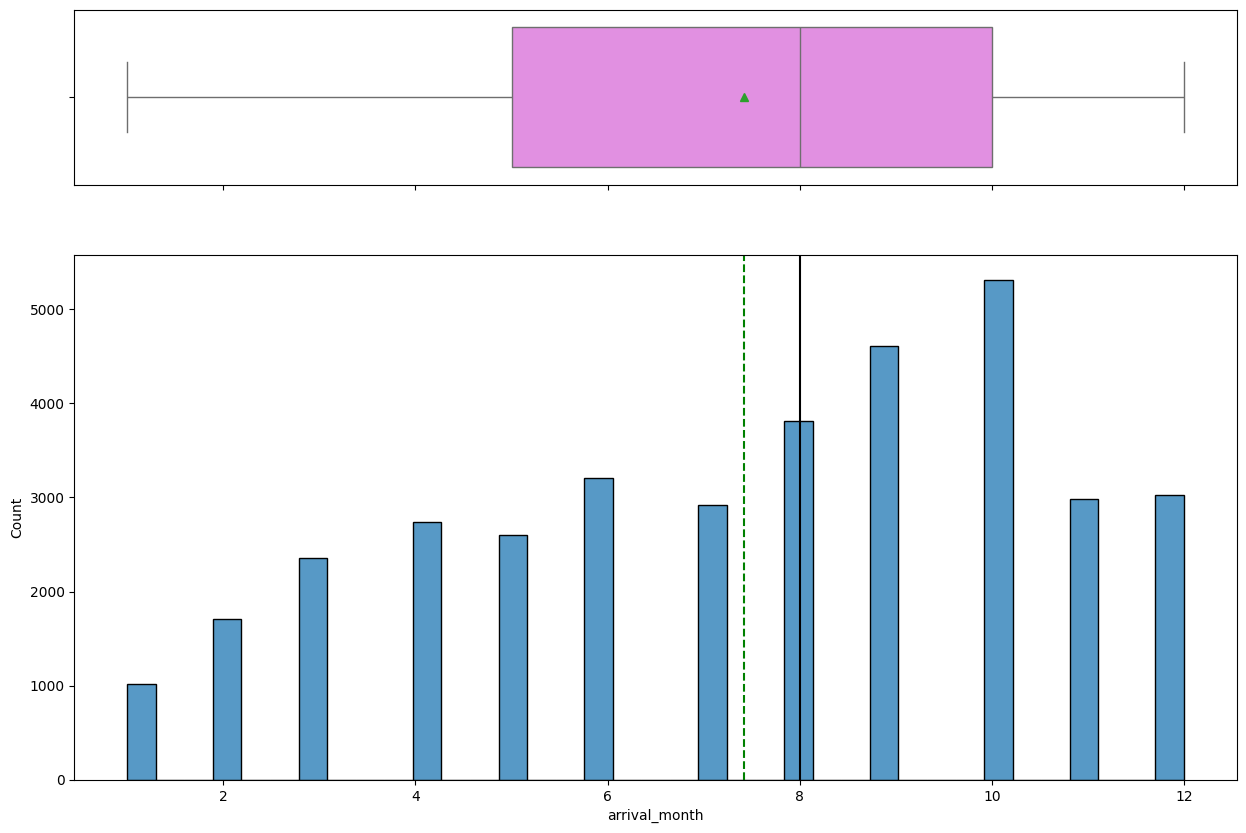

In [18]:
histogram_boxplot(data, "arrival_month")

We can observe that the most booked month is October, followed by September, however our mean it's in between July and August, but this is because the months are treated as numerical values, so in this case the mode is more relevant.

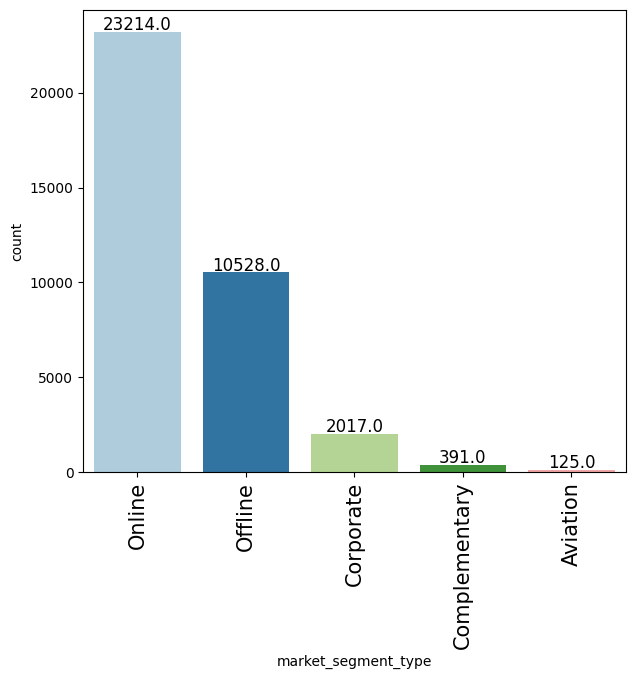

In [19]:
labeled_barplot(data, "market_segment_type")

We can observe that there's a big difference in the market segment type, the majority of the bookings are made online. It's interesting to observe that even though the mean of number and adults and days of the week indicated that possibly most booking were business type, the reality is that just a small fraction actually comes from a corporate segment. However it'll be interesting to collect the reason for travelling when booking online and offline and analyzing that, since those segments categories are a little vage.

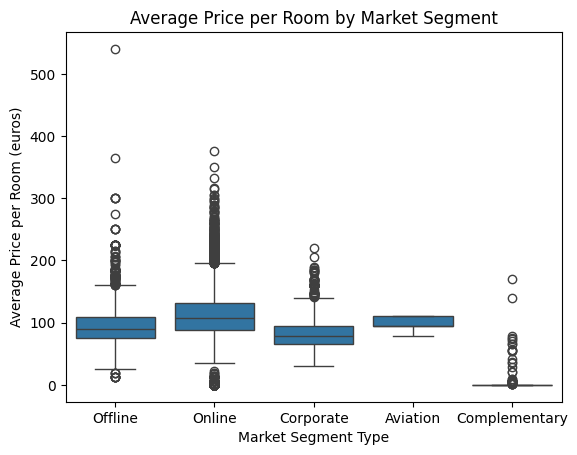

In [20]:
sns.boxplot(data=data, x='market_segment_type', y='avg_price_per_room')
plt.title('Average Price per Room by Market Segment')
plt.xlabel('Market Segment Type')
plt.ylabel('Average Price per Room (euros)')
plt.show()

We can see that bookings online have the higest prices overall, it makes sense considering that most of the bookings are made online. We can observe that the higest value was booked offline. Aviation has a consistent average price wich makes sense. And the complementary bookings have a lot of different values.

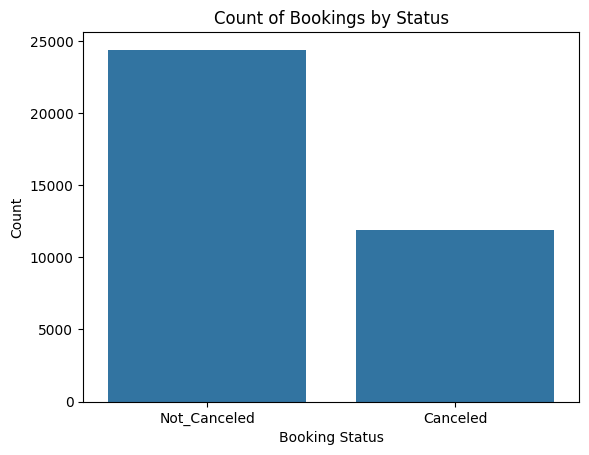

In [21]:
sns.countplot(data=df, x='booking_status')
plt.title('Count of Bookings by Status')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()

We can observe that the canceled bookings represent around 1/3rd of the bookings, this is a high amount an is not good for the hotel since the cancelation generate loss for the hotel.

will call a function to display the percentage of repeating guests that cancel

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


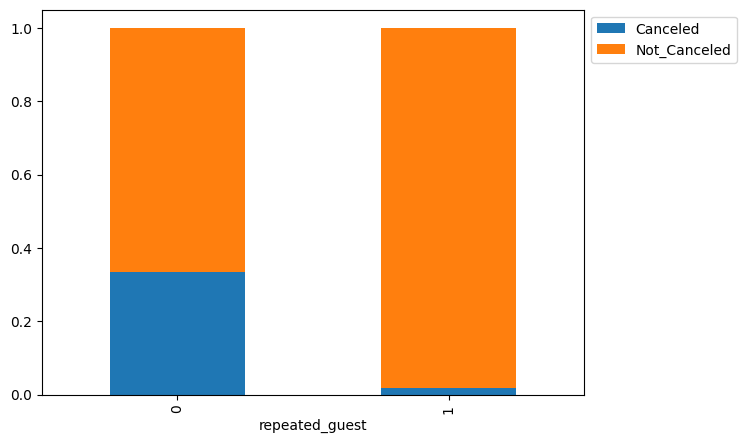

In [22]:
stacked_barplot(df, 'repeated_guest', 'booking_status')

We can observe that the only repeated guest the hotel had didn't cancel the booking. The repeated guest category doesn't really tells much since only 1 guest is repeated.

analyze requirements vs booking cancelations

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


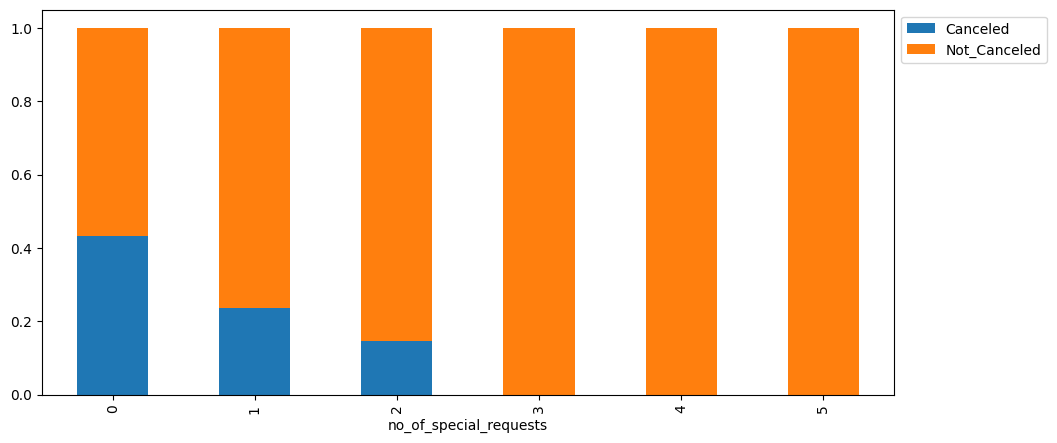

In [23]:
stacked_barplot(df, 'no_of_special_requests', 'booking_status')

We can observe that guests with no special requests tend to cancel their bookings more. This makes sense if we see it from the customer perspective. If you have a special request that not all hotels can provide or realize that the hotel you want can comply with the special request you are most likely keeping the reservation.

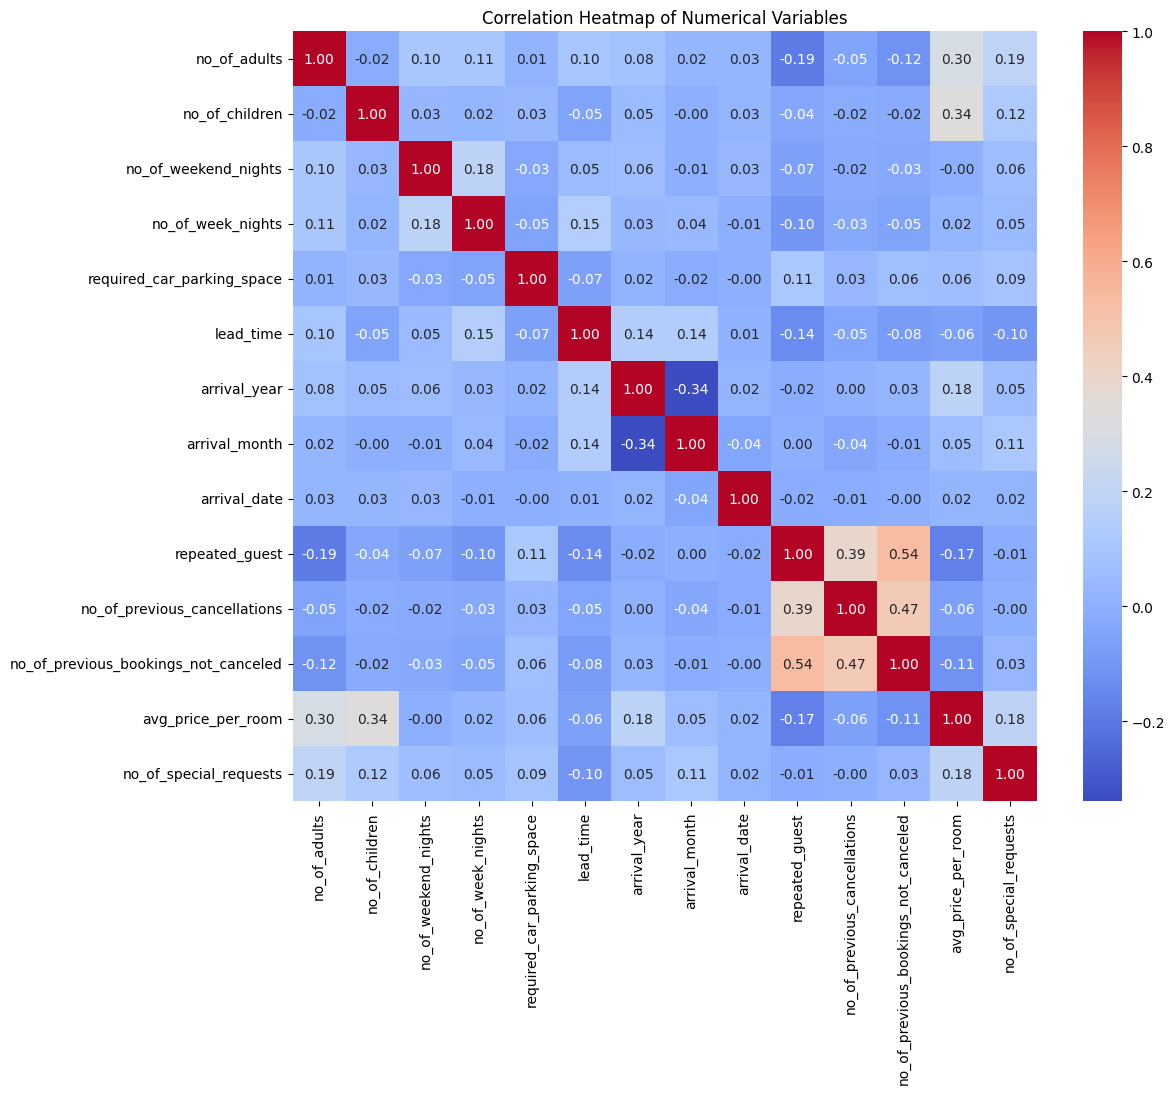

In [24]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

We can observe that the highest correlated categories are number of previos bookings not canceled and repeated guest, however we saw earlier that we only have one repeated guest so this isn't really an important parameter.

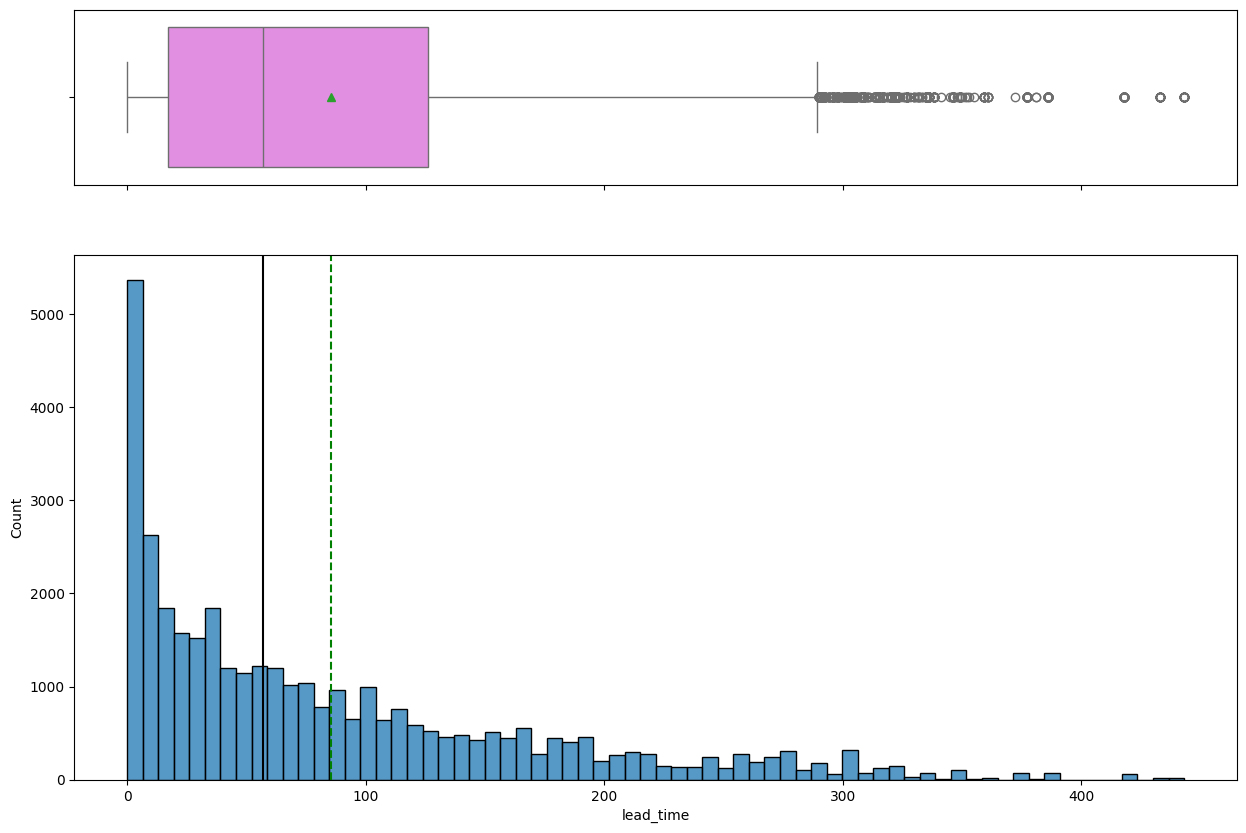

In [25]:
histogram_boxplot(data, "lead_time")

We can observe from the lead time histogram and box plot that most of the bookings are made for the same day, while the median is close to 90 days. We can also see a lot of outliers. It'll be interesting to analize the relationship between lead time and booking status.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

We checked the data for missing values already and we are all good, however feature engineering is needed to prepare the data for our model, but first we'll evaluate the outliers.

In [26]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.680,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.500,0,Canceled


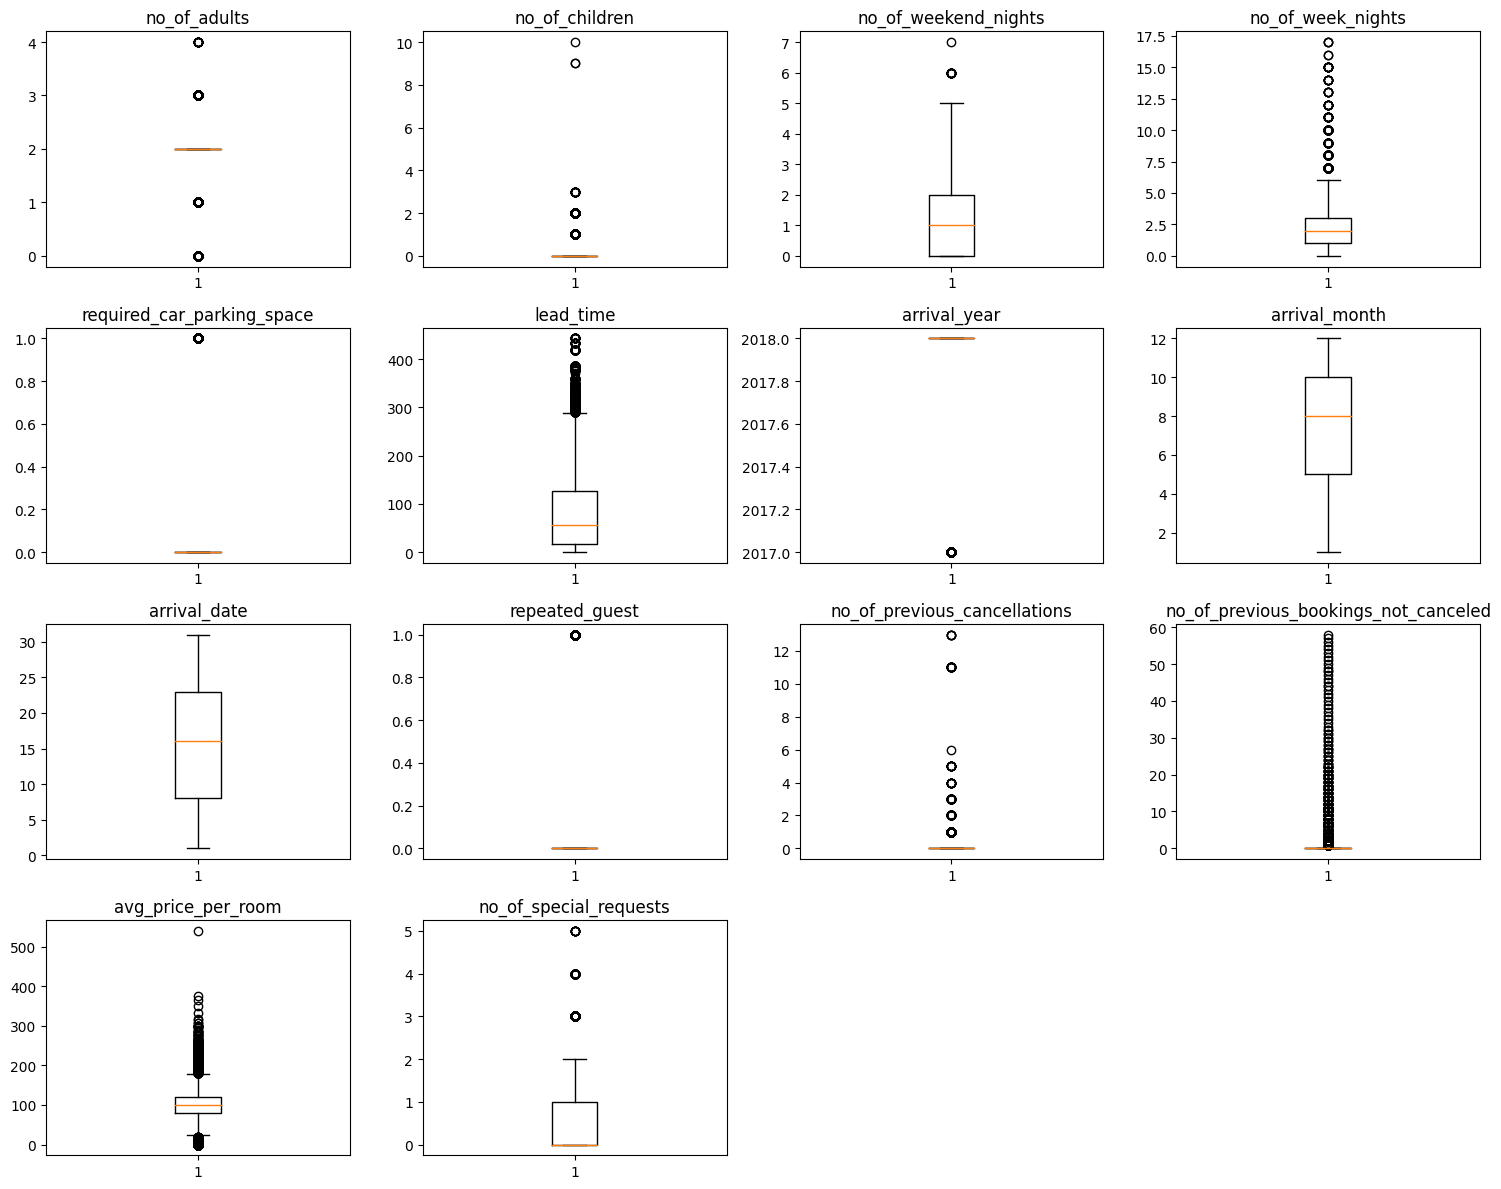

In [27]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Looking at the oultiers they do make sense, none of it seems to be a mistake or a weird value so I'll leave them as they are.

In [28]:
df.head().T

,0,1,2,3,4
no_of_adults,2,2,1,2,2
no_of_children,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1
no_of_week_nights,2,3,1,2,1
type_of_meal_plan,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected
required_car_parking_space,0,0,0,0,0
room_type_reserved,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead_time,224,5,1,211,48
arrival_year,2017,2018,2018,2018,2018
arrival_month,10,11,2,5,4


I'm looking at the data head once more before encoding my categories.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

Also looking at the data information before running the encodings to make sure everything is in order.

In [30]:
df.isnull().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0
arrival_month,0


I will enconde the categorical columns.

In [31]:
df = pd.get_dummies(df, columns=['type_of_meal_plan'])

It's important to convert the boolean data types of meal plan to integers

In [32]:
meal_cols = ['type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
             'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected']
df[meal_cols] = df[meal_cols].astype(int)

In [33]:
df['booking_status'] = df['booking_status'].astype(str).str.strip().str.replace('\xa0', '', regex=False)
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})
df['room_type_reserved'] = df['room_type_reserved'].astype('category').cat.codes
df['market_segment_type'] = df['market_segment_type'].astype('category').cat.codes
df['season'] = df['arrival_month'].apply(lambda m: (
    'Winter' if m in [12,1,2] else
    'Spring' if m in [3,4,5] else
    'Summer' if m in [6,7,8] else
    'Autumn'
)).astype('category').cat.codes

In [34]:
meal_cols = ['type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
             'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected']
df[meal_cols] = df[meal_cols].astype(int)

I'm custom engineering some new columns to get more data, like the number of total nights, declaring if the customers are family or not, if it's a long stay, stating if the customer has special requests, rather than the number of requests so the numerical values don't affect the models, total guests, I'll create lead time bins so we don't manage a lot of data for each price.

In [35]:
df['total_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
df['is_family'] = (df['no_of_children'] > 0).astype(int)
df['is_long_stay'] = (df['total_nights'] >= 7).astype(int)
df['has_special_request'] = (df['no_of_special_requests'] > 0).astype(int)
df['total_guests'] = df['no_of_adults'] + df['no_of_children']
df['price_per_night'] = (df['avg_price_per_room'] / df['total_nights']).replace([float('inf'), -float('inf')], 0)
df['lead_time_bucket'] = pd.cut(df['lead_time'],
                                bins=[-1, 7, 30, 90, 180, 9999],
                                labels=['very short', 'short', 'medium', 'long', 'very long']).astype('category').cat.codes

df['price_bucket'] = pd.qcut(df['avg_price_per_room'], q=4, labels=['low', 'medium', 'high', 'very high']).astype('category').cat.codes
df['price_x_lead_time'] = df['avg_price_per_room'] * df['lead_time']

In [36]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,season,total_nights,is_family,is_long_stay,has_special_request,total_guests,price_per_night,lead_time_bucket,price_bucket,price_x_lead_time
0,2,0,1,2,0,0,224,2017,10,2,3,0,0,0,65.000,0,0,1,0,0,0,0,3,0,0,0,2,21.667,4,0,14560.000
1,2,0,2,3,0,0,5,2018,11,6,4,0,0,0,106.680,1,0,0,0,0,1,0,5,0,0,1,2,21.336,0,2,533.400
2,1,0,2,1,0,0,1,2018,2,28,4,0,0,0,60.000,0,1,1,0,0,0,3,3,0,0,0,1,20.000,0,0,60.000
3,2,0,0,2,0,0,211,2018,5,20,4,0,0,0,100.000,0,1,1,0,0,0,1,2,0,0,0,2,50.000,4,2,21100.000
4,2,0,1,1,0,0,48,2018,4,11,4,0,0,0,94.500,0,1,0,0,0,1,1,2,0,0,0,2,47.250,2,1,4536.000


In [37]:
mapped = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})
print(mapped.isnull().sum())
print(mapped.unique())

36275
[nan]


When creating price per night column, some values where divided by 0 and marked as NaN, the net formula will turn those values back to 0.

In [38]:
df['price_per_night'] = (df['avg_price_per_room'] / df['total_nights']).replace([np.inf, -np.inf], np.nan)
df['price_per_night'] = df['price_per_night'].fillna(0)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   room_type_reserved                    36275 non-null  int8   
 6   lead_time                             36275 non-null  int64  
 7   arrival_year                          36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  market_segment_type                   36275 non-null  int8   
 11  repeated_guest 

In [40]:
df.isnull().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0
arrival_month,0
arrival_date,0


Now we have no missing values, some

## EDA

- It is a good idea to explore the data once again after manipulating it.

booking_status      0      1    All
is_family                          
All             24390  11885  36275
0               22695  10882  33577
1                1695   1003   2698
------------------------------------------------------------------------------------------------------------------------


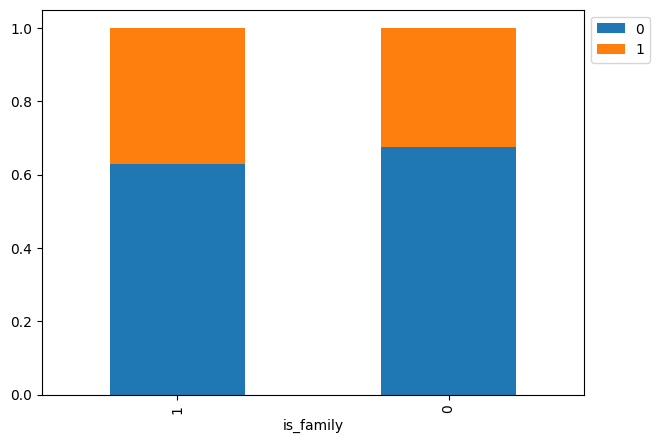

In [41]:
stacked_barplot(df, 'is_family', 'booking_status')

Families are less likely to cancel compared to non-family bookings.

booking_status      0      1    All
is_long_stay                       
All             24390  11885  36275
0               23537  11182  34719
1                 853    703   1556
------------------------------------------------------------------------------------------------------------------------


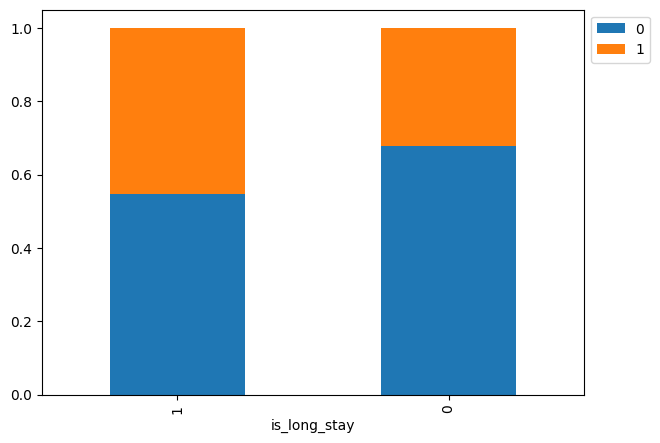

In [42]:
stacked_barplot(df, 'is_long_stay', 'booking_status')

Guests who booked long stays have a higher cancellation rate than short-stay guests.

booking_status           0      1    All
has_special_request                     
All                  24390  11885  36275
0                    11232   8545  19777
1                    13158   3340  16498
------------------------------------------------------------------------------------------------------------------------


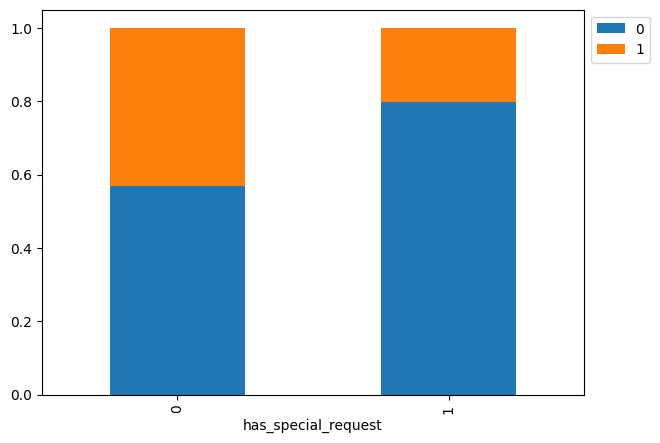

In [43]:
stacked_barplot(df, 'has_special_request', 'booking_status')

Guests who made a special request have a significantly lower cancellation rate than those who didn’t.

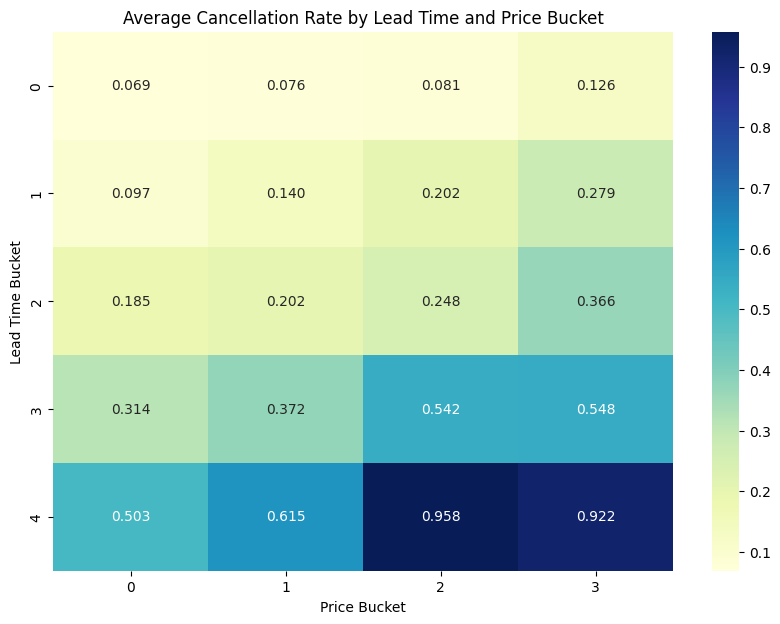

In [44]:
cancellation_pivot = df.pivot_table(values='booking_status', index='lead_time_bucket', columns='price_bucket', aggfunc='mean')

plt.figure(figsize=(10, 7))
sns.heatmap(cancellation_pivot, annot=True, cmap='YlGnBu', fmt=".3f")
plt.title('Average Cancellation Rate by Lead Time and Price Bucket')
plt.xlabel('Price Bucket')
plt.ylabel('Lead Time Bucket')
plt.show()

*   Guests who book last minute rarely cancel, regardless of price.
*   Early bookers of expensive rooms cancel the most.

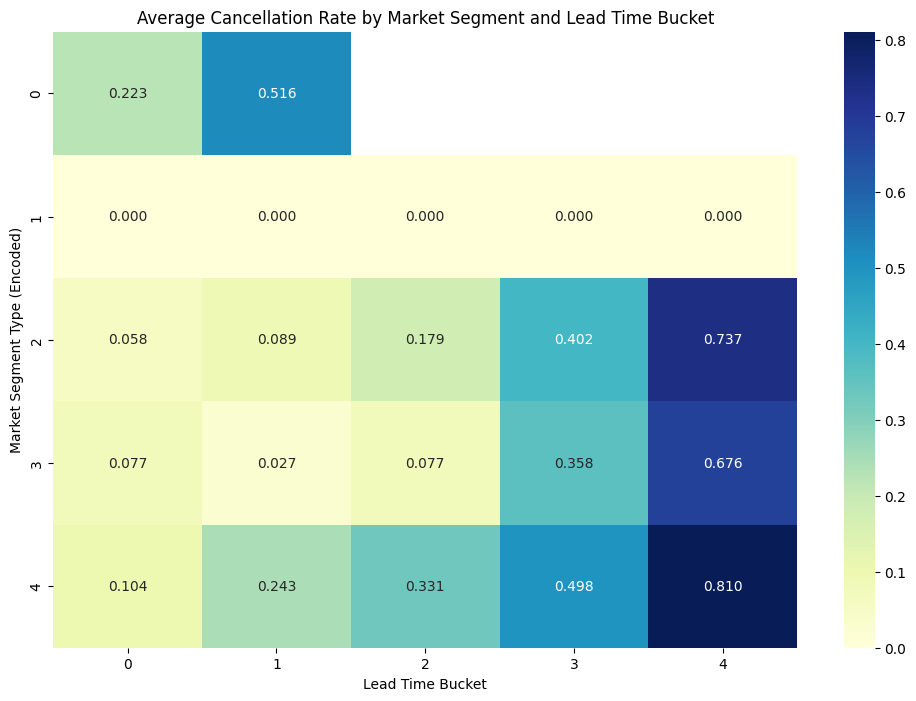

In [45]:
market_lead_pivot = df.pivot_table(values='booking_status', index='market_segment_type', columns='lead_time_bucket', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(market_lead_pivot, annot=True, cmap='YlGnBu', fmt=".3f")
plt.title('Average Cancellation Rate by Market Segment and Lead Time Bucket')
plt.xlabel('Lead Time Bucket')
plt.ylabel('Market Segment Type (Encoded)') # Remember these are encoded now
plt.show()

Segment 1 customers are highly reliable

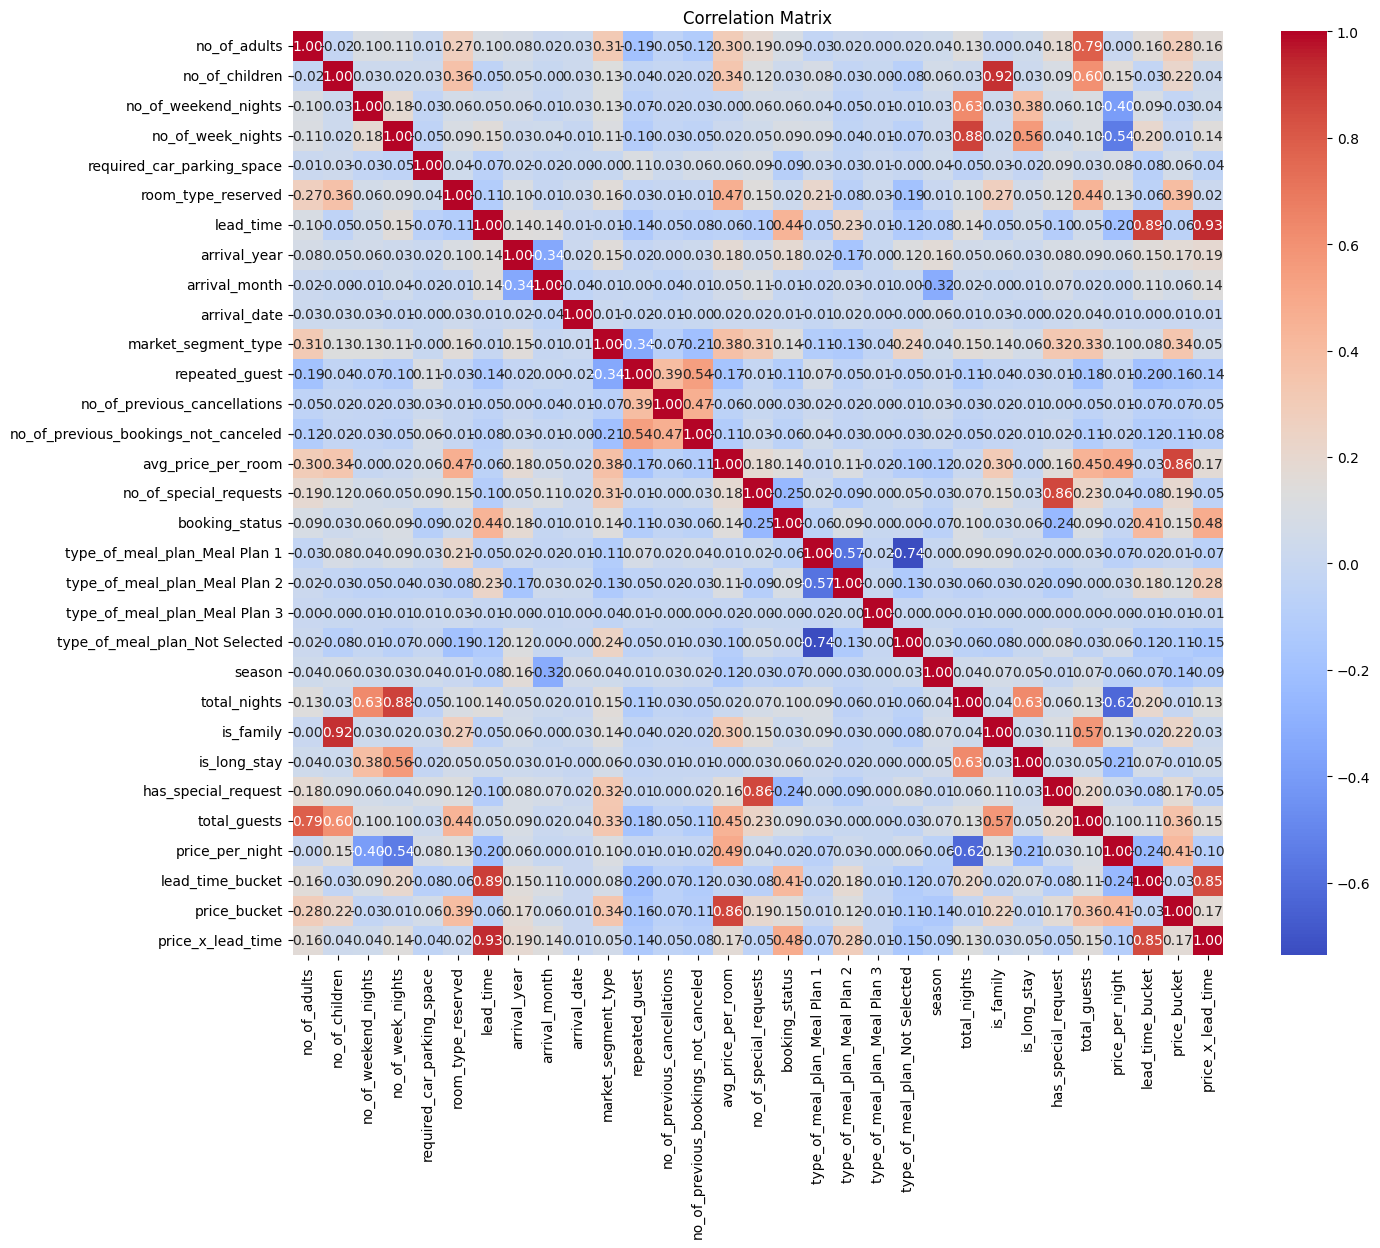

In [46]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

We created some engineering columns so we can find more correlationss after preping our data, for example, the higest correlation it's between the number of children and is a family column. Is family column was created for evaluation taking the number of children column information, so it makes sense to find a high correlation now. We can also find high correlation between lead time and price x lead time, whic it's also an engineered column.

In [47]:
df['price_per_night'] = (df['avg_price_per_room'] / df['total_nights']).replace([np.inf, -np.inf], np.nan)
df['price_per_night'] = df['price_per_night'].fillna(0)

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = df.drop('booking_status', axis=1)
X_vif = add_constant(X_vif)

vif = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)

print(vif)

const                                   0.000
no_of_adults                              inf
no_of_children                            inf
no_of_weekend_nights                      inf
no_of_week_nights                         inf
required_car_parking_space              1.036
room_type_reserved                      1.627
lead_time                              16.746
arrival_year                            1.446
arrival_month                           1.345
arrival_date                            1.009
market_segment_type                     1.716
repeated_guest                          1.685
no_of_previous_cancellations            1.344
no_of_previous_bookings_not_canceled    1.605
avg_price_per_room                      6.498
no_of_special_requests                  4.082
type_of_meal_plan_Meal Plan 1             inf
type_of_meal_plan_Meal Plan 2             inf
type_of_meal_plan_Meal Plan 3             inf
type_of_meal_plan_Not Selected            inf
season                            

We can observe that we have several correlated values, some are obvious from my feature engineering, so I'll start dropping the higgest ones, the ones with "inf"

Defining a function to calculate VIF since we'll calculate this often.

In [49]:
def calculate_vif(df, target='booking_status'):
    X = df.drop(target, axis=1)
    X = add_constant(X)
    vif = pd.Series(
        [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
        index=X.columns
    )
    return vif

In [50]:
df = df.drop('type_of_meal_plan_Not Selected', axis=1)

In [51]:
calculate_vif(df)

,0
const,39973564.575
no_of_adults,inf
no_of_children,inf
no_of_weekend_nights,inf
no_of_week_nights,inf
required_car_parking_space,1.036
room_type_reserved,1.627
lead_time,16.746
arrival_year,1.446
arrival_month,1.345


In [52]:
df = df.drop('total_guests', axis=1)

In [53]:
calculate_vif(df)

,0
const,39973564.575
no_of_adults,1.335
no_of_children,7.998
no_of_weekend_nights,inf
no_of_week_nights,inf
required_car_parking_space,1.036
room_type_reserved,1.627
lead_time,16.746
arrival_year,1.446
arrival_month,1.345


In [54]:
df = df.drop('no_of_children', axis=1)

In [55]:
calculate_vif(df)

,0
const,39760527.182
no_of_adults,1.299
no_of_weekend_nights,inf
no_of_week_nights,inf
required_car_parking_space,1.036
room_type_reserved,1.482
lead_time,16.746
arrival_year,1.438
arrival_month,1.344
arrival_date,1.009


In [56]:
df = df.drop('no_of_weekend_nights', axis=1)

In [57]:
calculate_vif(df)

,0
const,39760527.182
no_of_adults,1.299
no_of_week_nights,4.407
required_car_parking_space,1.036
room_type_reserved,1.482
lead_time,16.746
arrival_year,1.438
arrival_month,1.344
arrival_date,1.009
market_segment_type,1.716


In [58]:
df = df.drop('no_of_week_nights', axis=1)

In [59]:
calculate_vif(df)

,0
const,39704803.519
no_of_adults,1.297
required_car_parking_space,1.036
room_type_reserved,1.482
lead_time,16.743
arrival_year,1.436
arrival_month,1.344
arrival_date,1.008
market_segment_type,1.713
repeated_guest,1.684


In [60]:
df = df.drop('lead_time', axis=1)

In [61]:
calculate_vif(df)

,0
const,39661972.169
no_of_adults,1.297
required_car_parking_space,1.036
room_type_reserved,1.474
arrival_year,1.435
arrival_month,1.340
arrival_date,1.008
market_segment_type,1.711
repeated_guest,1.681
no_of_previous_cancellations,1.343


In [62]:
df = df.drop('avg_price_per_room', axis=1)

In [63]:
calculate_vif(df)

,0
const,39560975.103
no_of_adults,1.290
required_car_parking_space,1.036
room_type_reserved,1.388
arrival_year,1.431
arrival_month,1.339
arrival_date,1.008
market_segment_type,1.681
repeated_guest,1.680
no_of_previous_cancellations,1.343


Now all the high correlated columns were removed we can use our data to build the models.

## Building a Logistic Regression model

I'm declaring my target variable which is the booking status, creating and printing my Logit model

In [64]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

feature_cols = df.drop('booking_status', axis=1).columns.tolist()

X = df[feature_cols]
y = df['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit(disp=False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    28996
Method:                           MLE   Df Model:                           23
Date:                Mon, 30 Jun 2025   Pseudo R-squ.:                  0.3289
Time:                        03:01:46   Log-Likelihood:                -12319.
converged:                       True   LL-Null:                       -18355.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1128.7323    113.764     -9.922      0.000   -1351.707    -905.758
no_of_adults                             0.0533      

*   Guests who request a parking space are much less likely to cancel.
*   Guests with certain room types reserved are less likely to cancel.
*   The longer the time between booking and stay, the more likely they are to cancel.
*   Repeat guests cancel less. Makes sense—loyal customers are more reliable (However we only have 1 repeated guest that did not cancle so this coefficient really tells nothing)





## Model performance evaluation

In [65]:
pred_train = lg.predict(sm.add_constant(X_train))
pred_test = lg.predict(sm.add_constant(X_test))

pred_train = np.round(pred_train)
pred_test = np.round(pred_test)

In [66]:
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    pred_temp = model.predict(predictors) > threshold
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [67]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):

    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Calling the confusion matrix function for this model

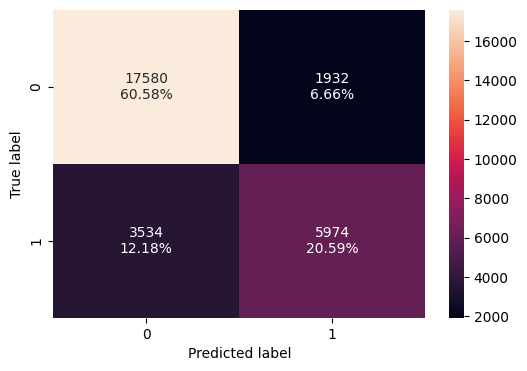

In [68]:
confusion_matrix_statsmodels(lg, sm.add_constant(X_train[feature_cols]), y_train)

*   Out of 31,020 bookings, the model correctly predicted 20% of the cancellations.
*   It accurately predicted 17,580 guests would show up.
*   It incorrectly flagged 1,932 bookings as cancellations.
*   It failed to predict 3,534 actual cancellations, causing empty rooms and lost revenue.




Calling the function to calculate scoring metrics

In [69]:
model_performance_classification_statsmodels (lg, sm.add_constant(X_train[feature_cols]), y_train)

,Accuracy,Recall,Precision,F1
0,0.812,0.628,0.756,0.686


This model's accuracy

I will remove the columns with highes p value and re calculate accuracy, recall and precision to optimize the model.

In [70]:
X = X.drop('is_long_stay', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit(disp=False)
pred_train = lg.predict(sm.add_constant(X_train)) > 0.5
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    28997
Method:                           MLE   Df Model:                           22
Date:                Mon, 30 Jun 2025   Pseudo R-squ.:                  0.3289
Time:                        03:01:47   Log-Likelihood:                -12319.
converged:                       True   LL-Null:                       -18355.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1130.2099    113.730     -9.938      0.000   -1353.116    -907.304
no_of_adults                             0.0537      

In [71]:
accuracy = accuracy_score(y_train, pred_train)
print("Accuracy:", accuracy)
recall = recall_score(y_train, pred_train)
print("Recall:", recall)
precision = precision_score(y_train, pred_train)
print("Precision:", precision)

Accuracy: 0.812198483804273
Recall: 0.6282078249894826
Precision: 0.7572261663286004


In [72]:
X = X.drop('no_of_previous_bookings_not_canceled', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit(disp=False)
pred_train = lg.predict(sm.add_constant(X_train)) > 0.5
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    28998
Method:                           MLE   Df Model:                           21
Date:                Mon, 30 Jun 2025   Pseudo R-squ.:                  0.3288
Time:                        03:01:47   Log-Likelihood:                -12319.
converged:                       True   LL-Null:                       -18355.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1129.1826    113.725     -9.929      0.000   -1352.079    -906.286
no_of_adults                      0.0538      0.034      1.564      0.118 

In [73]:
accuracy = accuracy_score(y_train, pred_train)
print("Accuracy:", accuracy)
recall = recall_score(y_train, pred_train)
print("Recall:", recall)
precision = precision_score(y_train, pred_train)
print("Precision:", precision)

Accuracy: 0.8121295658166782
Recall: 0.6279974758098443
Precision: 0.7571645954856708


Our metric scores remained the same after dropping the columns which is a good sign.

In [74]:
X = X.drop('type_of_meal_plan_Meal Plan 3', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit(disp=False)
pred_train = lg.predict(sm.add_constant(X_train)) > 0.5
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    28999
Method:                           MLE   Df Model:                           20
Date:                Mon, 30 Jun 2025   Pseudo R-squ.:                  0.3288
Time:                        03:01:48   Log-Likelihood:                -12320.
converged:                       True   LL-Null:                       -18355.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1126.4188    113.679     -9.909      0.000   -1349.227    -903.611
no_of_adults                      0.0539      0.034      1.569      0.117 

In [75]:
accuracy = accuracy_score(y_train, pred_train)
print("Accuracy:", accuracy)
recall = recall_score(y_train, pred_train)
print("Recall:", recall)
precision = precision_score(y_train, pred_train)
print("Precision:", precision)

Accuracy: 0.8119228118538938
Recall: 0.6278923012200253
Precision: 0.7566539923954373


After removing type of meals the metrics scorings dropped a little, but the difference is not significant so I will keep these changes.

In [76]:
X = X.drop('no_of_adults', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit(disp=False)
pred_train = lg.predict(sm.add_constant(X_train)) > 0.5
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    29000
Method:                           MLE   Df Model:                           19
Date:                Mon, 30 Jun 2025   Pseudo R-squ.:                  0.3287
Time:                        03:01:48   Log-Likelihood:                -12321.
converged:                       True   LL-Null:                       -18355.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1122.2920    113.666     -9.874      0.000   -1345.073    -899.511
required_car_parking_space       -1.4978      0.131    -11.447      0.000 

In [77]:
accuracy = accuracy_score(y_train, pred_train)
print("Accuracy:", accuracy)
recall = recall_score(y_train, pred_train)
print("Recall:", recall)
precision = precision_score(y_train, pred_train)
print("Precision:", precision)

Accuracy: 0.8119228118538938
Recall: 0.6279974758098443
Precision: 0.75658895083629


In [78]:
X = X.drop('no_of_previous_cancellations', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit(disp=False)
pred_train = lg.predict(sm.add_constant(X_train)) > 0.5
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    29001
Method:                           MLE   Df Model:                           18
Date:                Mon, 30 Jun 2025   Pseudo R-squ.:                  0.3287
Time:                        03:01:49   Log-Likelihood:                -12322.
converged:                       True   LL-Null:                       -18355.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1122.6400    113.655     -9.878      0.000   -1345.400    -899.880
required_car_parking_space       -1.4986      0.131    -11.454      0.000 

In [79]:
accuracy = accuracy_score(y_train, pred_train)
print("Accuracy:", accuracy)
recall = recall_score(y_train, pred_train)
print("Recall:", recall)
precision = precision_score(y_train, pred_train)
print("Precision:", precision)

Accuracy: 0.8118883528600965
Recall: 0.6277871266302062
Precision: 0.7566231461528711


In [80]:
odds = np.exp(lg.params)
odds

,0
const,0.000
required_car_parking_space,0.223
room_type_reserved,0.959
arrival_year,1.739
arrival_month,0.939
arrival_date,1.005
market_segment_type,3.272
repeated_guest,0.225
no_of_special_requests,0.342
type_of_meal_plan_Meal Plan 1,0.691


In [81]:
pd.DataFrame(odds, X_train.columns, columns=['Odds']).T

,required_car_parking_space,room_type_reserved,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_special_requests,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,season,total_nights,is_family,has_special_request,price_per_night,lead_time_bucket,price_bucket,price_x_lead_time
Odds,0.223,0.959,1.739,0.939,1.005,3.272,0.225,0.342,0.691,0.629,0.791,1.137,1.234,0.583,1.004,1.145,1.216,1.000


When looking at the odds, we can see thet price per night, price x lead time and arrival date are closest to 1, we well drop them and evaluate if they improve our model precision.

In [82]:
df = df.drop('price_per_night', axis=1)

feature_cols = df.drop('booking_status', axis=1).columns.tolist()

X = df[feature_cols]
y = df['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit(disp=False)
print(lg.summary())

pred_train = lg.predict(sm.add_constant(X_train)) > 0.5
accuracy = accuracy_score(y_train, pred_train)
print("Accuracy:", accuracy)
recall = recall_score(y_train, pred_train)
print("Recall:", recall)
precision = precision_score(y_train, pred_train)
print("Precision:", precision)


                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    28997
Method:                           MLE   Df Model:                           22
Date:                Mon, 30 Jun 2025   Pseudo R-squ.:                  0.3282
Time:                        03:01:49   Log-Likelihood:                -12330.
converged:                       True   LL-Null:                       -18355.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1151.8989    113.536    -10.146      0.000   -1374.426    -929.372
no_of_adults                             0.0504      

We can see that the metrics improved by removing price per night, so it was a good call.

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    28998
Method:                           MLE   Df Model:                           21
Date:                Mon, 30 Jun 2025   Pseudo R-squ.:                  0.3281
Time:                        03:01:49   Log-Likelihood:                -12334.
converged:                       True   LL-Null:                       -18355.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1154.8705    113.641    -10.162      0.000   -1377.602    -932.138
no_of_adults                             0.0524      

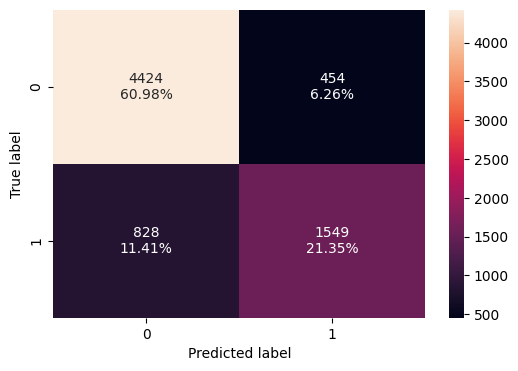

In [83]:
df = df.drop(['arrival_date'], axis=1, errors='ignore')

feature_cols = df.drop('booking_status', axis=1).columns.tolist()

X = df[feature_cols]
y = df['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit(disp=False)
print(lg.summary())

pred_train = lg.predict(sm.add_constant(X_train)) > 0.5
accuracy = accuracy_score(y_train, pred_train)
print("Accuracy:", accuracy)
recall = recall_score(y_train, pred_train)
print("Recall:", recall)
precision = precision_score(y_train, pred_train)
print("Precision:", precision)

pred_test = lg.predict(sm.add_constant(X_test)) > 0.5
accuracy_test = accuracy_score(y_test, pred_test)
print("Test Accuracy:", accuracy_test)
recall_test = recall_score(y_test, pred_test)
print("Test Recall:", recall_test)
precision_test = precision_score(y_test, pred_test)
print("Test Precision:", precision_test)

confusion_matrix_statsmodels(lg, sm.add_constant(X_test), y_test)

Removing arrival date improved our model significantly, so we are good to keep the model like this.

## Final Model Summary

creating final model confusion matrix

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    28998
Method:                           MLE   Df Model:                           21
Date:                Mon, 30 Jun 2025   Pseudo R-squ.:                  0.3281
Time:                        03:01:50   Log-Likelihood:                -12334.
converged:                       True   LL-Null:                       -18355.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1154.8705    113.641    -10.162      0.000   -1377.602    -932.138
no_of_adults                             0.0524      

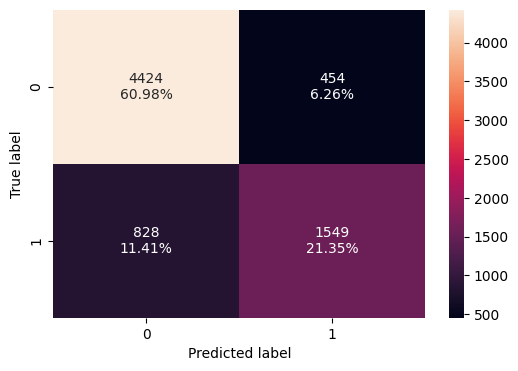

In [84]:
X = df[feature_cols]
y = df['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit(disp=False)
print(lg.summary())

pred_train = lg.predict(sm.add_constant(X_train)) > 0.5
accuracy = accuracy_score(y_train, pred_train)
print("Accuracy:", accuracy)
recall = recall_score(y_train, pred_train)
print("Recall:", recall)
precision = precision_score(y_train, pred_train)
print("Precision:", precision)

pred_test = lg.predict(sm.add_constant(X_test)) > 0.5
accuracy_test = accuracy_score(y_test, pred_test)
print("Test Accuracy:", accuracy_test)
recall_test = recall_score(y_test, pred_test)
print("Test Recall:", recall_test)
precision_test = precision_score(y_test, pred_test)
print("Test Precision:", precision_test)

confusion_matrix_statsmodels(lg, sm.add_constant(X_test), y_test)

Comparing the initial model vs this final model we can observe that:


*   Accuracy improved by 0.1%
*   Precision improved by 1.2%
*   Recall slightly dropped but the model actually improved it's predictions reducing our false negatives which have a higer cost for the hotels.

*   True positives improved from a 20.59% to 21.35%
*   True negatives slightly improved from 60.58 to 60.98%
*   False positives dropped from 	6.66% to 6.26%
*   False negatives dropped from 12.18% to 11.41

This model improved catching the right cancelers, and decreased the wrongly flagged clients which it's good for the hotel. We can improve this with a decision tree model.





ROC-AUC

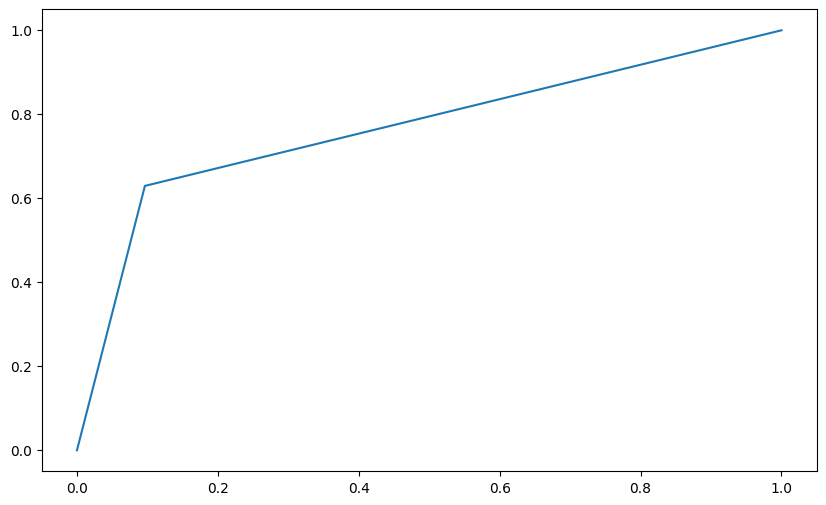

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve

logit_roc_auc = roc_auc_score(y_train, pred_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_train)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

We can observe form the ROC curve that the model is not flat which is a good sign of the model's behaviour overall but it can still do better.

## Building a Decision Tree model

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from os import system

X = df.drop('booking_status', axis=1)
y = df.pop('booking_status')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [87]:
dtree = DecisionTreeClassifier(criterion = 'gini', random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.9919365954514128
Recall: 0.9811737484223811
Precision: 0.9941389599317988
Test Accuracy: 0.8606478290833908
Test Recall: 0.7871266302061422
Test Precision: 0.7874579124579124


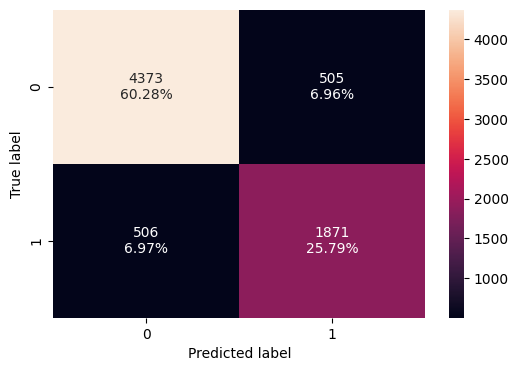

In [88]:
pred_train = dtree.predict(X_train)

accuracy = accuracy_score(y_train, pred_train)
print("Accuracy:", accuracy)
recall = recall_score(y_train, pred_train)
print("Recall:", recall)
precision = precision_score(y_train, pred_train)
print("Precision:", precision)


pred_test = dtree.predict(X_test)

accuracy_test = accuracy_score(y_test, pred_test)
print("Test Accuracy:", accuracy_test)
recall_test = recall_score(y_test, pred_test)
print("Test Recall:", recall_test)
precision_test = precision_score(y_test, pred_test)
print("Test Precision:", precision_test)

confusion_matrix_statsmodels(dtree, X_test, y_test)

By observing the decision tree results, we can see that accuracy it's really close to 1 which can be indicating overfitting.
Comparing this results and the logit model results we can observe that:


*   The predicted true negatives dropped.
*   True positives improves which means the model catches more cancelations.
*   False positives dropped too so we have more cancelation wrong predictions
*   False negatives dropped which is good, the model misses less cancelations.


Visualizing the decision tree

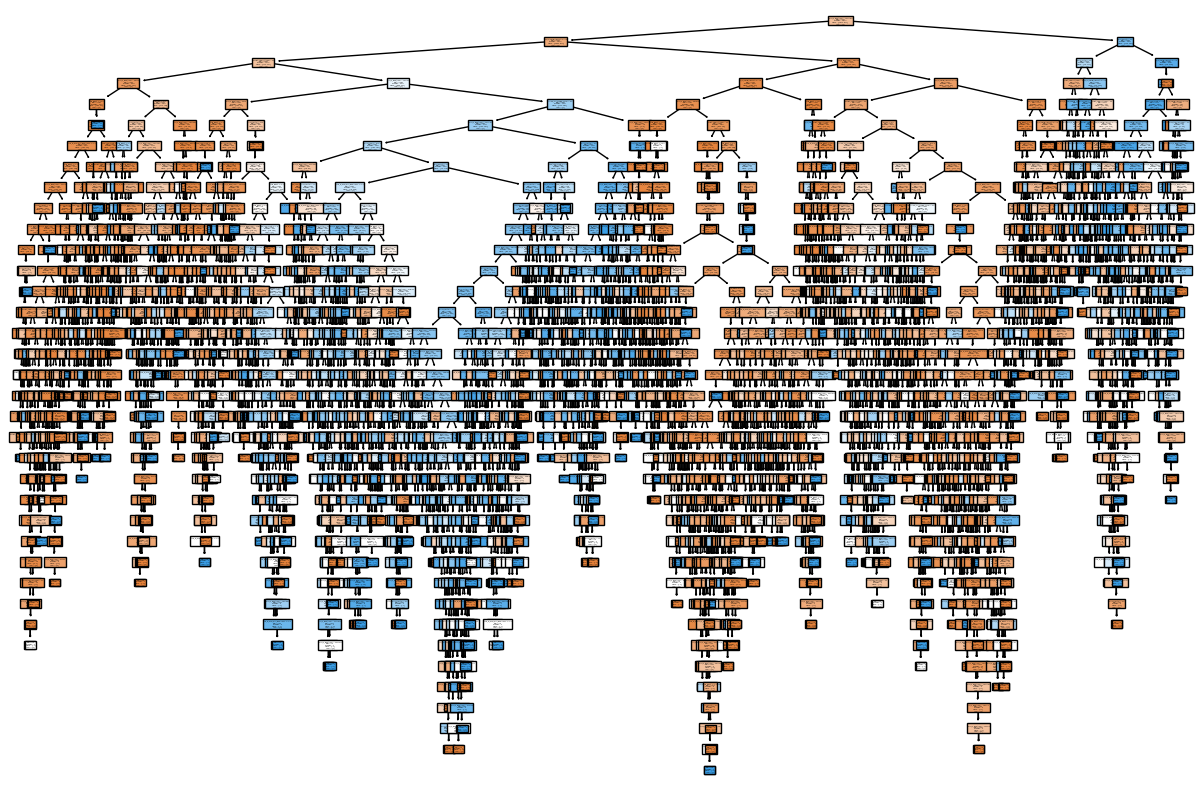

In [89]:
feature_names = list(df.columns)
plt.figure(figsize=(15,10))
tree.plot_tree(dtree, feature_names=feature_names, filled=True, node_ids=True, class_names=True)
plt.show()

In [90]:
print(tree.export_text(dtree, feature_names=feature_names, show_weights=True))

|--- price_x_lead_time <= 16793.37
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 3.50
|   |   |   |--- price_x_lead_time <= 6854.00
|   |   |   |   |--- total_nights <= 14.50
|   |   |   |   |   |--- arrival_month <= 9.50
|   |   |   |   |   |   |--- type_of_meal_plan_Meal Plan 2 <= 0.50
|   |   |   |   |   |   |   |--- total_nights <= 3.50
|   |   |   |   |   |   |   |   |--- price_x_lead_time <= 3079.00
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- price_x_lead_time <= 57.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |   |--- price_x_lead_time >  57.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 20
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- price_x_lead_time <= 2887.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [

From the decision tree visualization, we can tell that the most important columns for the model are price x lead time, number of spacial requests, market segments, total nights and arrival month.

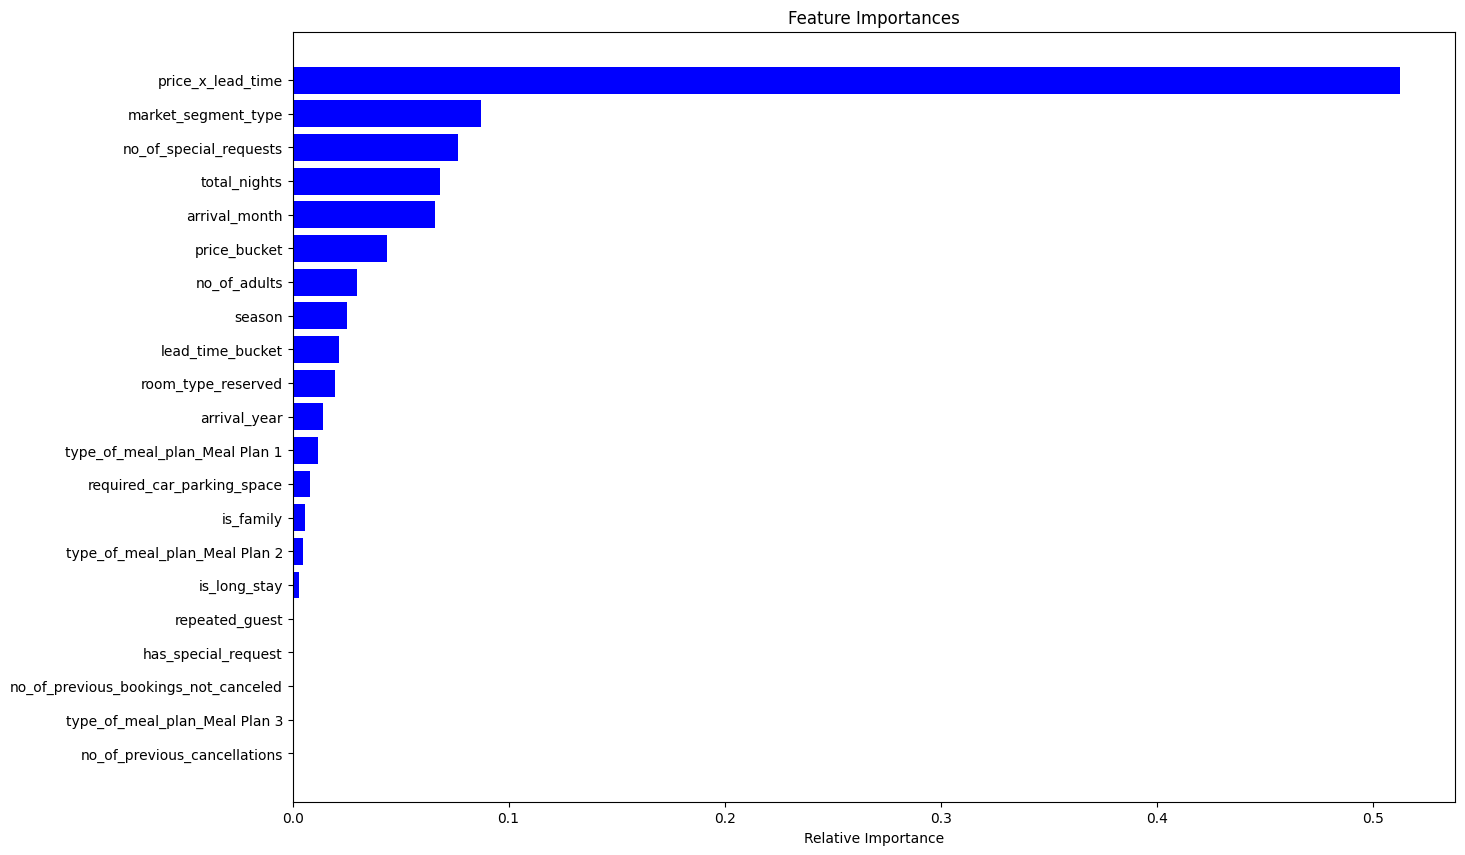

In [91]:
importances = dtree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This tree decision model takes the price x lead time as the most important caracteristic for prediction.

## Do we need to prune the tree?

We definitelly need to prune this tree since it's over fitting. I will see how it performs by just limiting the max depth.

In [92]:
dtree1 = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=50, random_state=42)
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=42)

Getting the scoring metrics and confusion metrics of the pruned tree.

Accuracy: 0.8308752584424535
Recall: 0.6779554059739167
Precision: 0.7773757838880849
Test Accuracy: 0.8388697450034459
Test Recall: 0.6996213714766513
Test Precision: 0.7851746931067044


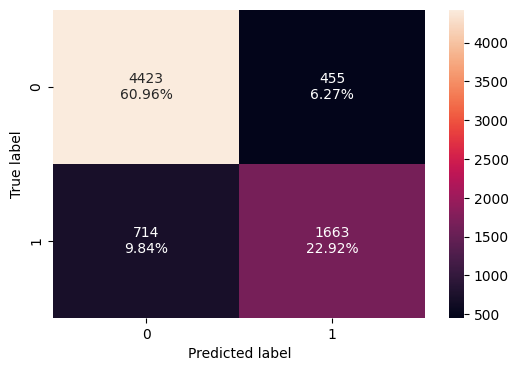

In [93]:
pred_train = dtree1.predict(X_train)

accuracy = accuracy_score(y_train, pred_train)
print("Accuracy:", accuracy)
recall = recall_score(y_train, pred_train)
print("Recall:", recall)
precision = precision_score(y_train, pred_train)
print("Precision:", precision)


pred_test = dtree1.predict(X_test)

accuracy_test = accuracy_score(y_test, pred_test)
print("Test Accuracy:", accuracy_test)
recall_test = recall_score(y_test, pred_test)
print("Test Recall:", recall_test)
precision_test = precision_score(y_test, pred_test)
print("Test Precision:", precision_test)

confusion_matrix_statsmodels(dtree1, X_test, y_test)

We can see that accuracy dropped but is not bad since the other model was overfitting, Recall dropped but it's still good and precision and f1 score stayed stable.

*   False positives and true negatives improved so we decreased the mistakes assuming a customer won't show
*   Model is less complex and less prone to overfitting.

Visualizing again with fewer layers

In [94]:
print(tree.export_text(dtree1, feature_names=feature_names, show_weights=True))

|--- price_x_lead_time <= 16793.37
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 3.50
|   |   |   |--- price_x_lead_time <= 6854.00
|   |   |   |   |--- weights: [3959.00, 311.00] class: 0
|   |   |   |--- price_x_lead_time >  6854.00
|   |   |   |   |--- weights: [1673.00, 728.00] class: 0
|   |   |--- market_segment_type >  3.50
|   |   |   |--- price_x_lead_time <= 1646.92
|   |   |   |   |--- weights: [1424.00, 414.00] class: 0
|   |   |   |--- price_x_lead_time >  1646.92
|   |   |   |   |--- weights: [1414.00, 2822.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- price_x_lead_time <= 4659.25
|   |   |   |--- no_of_special_requests <= 1.50
|   |   |   |   |--- weights: [3943.00, 442.00] class: 0
|   |   |   |--- no_of_special_requests >  1.50
|   |   |   |   |--- weights: [1837.00, 29.00] class: 0
|   |   |--- price_x_lead_time >  4659.25
|   |   |   |--- no_of_special_requests <= 1.50
|   |   |   |   |--- weights: [2675.00, 742.00] c

Visualizing importance

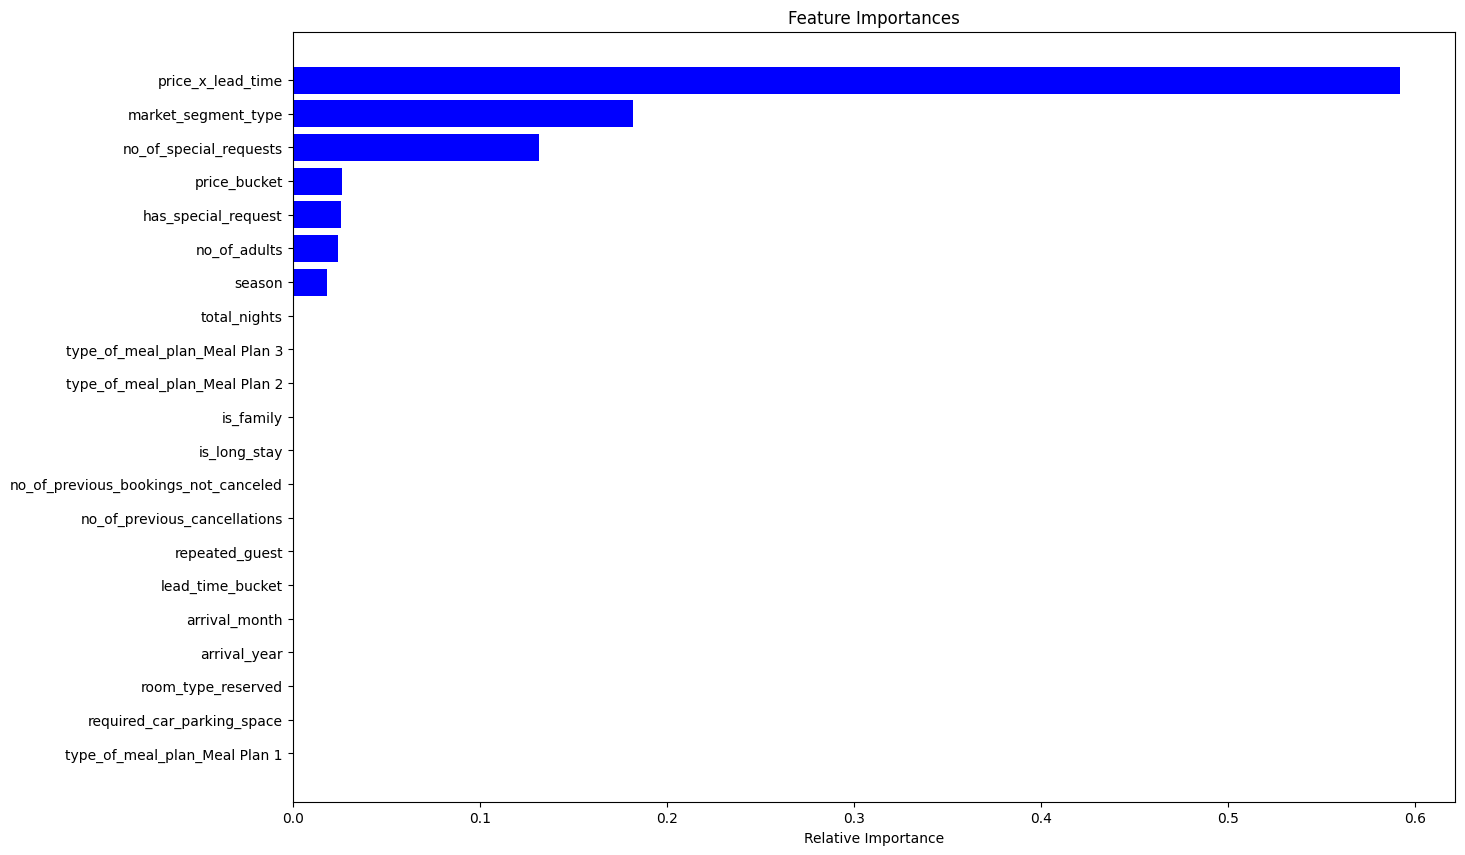

In [95]:
importances = dtree1.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We can observe that by limiting the decision tree, the importance features dropped, making our model less complex.

Now I will using GridSearch for hyperparameter tuning and see how the model behaves.

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
estimator = DecisionTreeClassifier(random_state=42)

Setting the ranges for each parameter

I limited my parameters since the gridsearch is takimg so much power and not running.

In [102]:
parameters = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [5, 10, 20],
    'min_impurity_decrease': [0.0, 0.001, 0.01]
}

In [99]:
from sklearn import metrics
acc_scorer = metrics.make_scorer(metrics.recall_score)

Run grid search

Finding best estimator

In [103]:
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [104]:
estimator = grid_obj.best_estimator_
print(estimator)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, random_state=42)


## Model Performance Comparison and Conclusions

Accuracy: 0.780565127498277
Recall: 0.7471602860748843
Precision: 0.6418503794723527
Test Accuracy: 0.7898001378359751
Test Recall: 0.7589398401346235
Test Precision: 0.6545718432510885


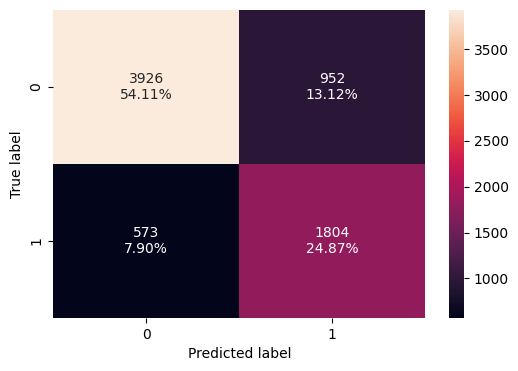

In [105]:
pred_train = estimator.predict(X_train)

accuracy = accuracy_score(y_train, pred_train)
print("Accuracy:", accuracy)
recall = recall_score(y_train, pred_train)
print("Recall:", recall)
precision = precision_score(y_train, pred_train)
print("Precision:", precision)


pred_test = estimator.predict(X_test)

accuracy_test = accuracy_score(y_test, pred_test)
print("Test Accuracy:", accuracy_test)
recall_test = recall_score(y_test, pred_test)
print("Test Recall:", recall_test)
precision_test = precision_score(y_test, pred_test)
print("Test Precision:", precision_test)

confusion_matrix_statsmodels(estimator, X_test, y_test)

In this pre pruned model with a small grid search of 324 combos we can observe that the accuracy ad precisdion dropped, however our recall increased which it's good.
This model also accurately predicts more cancelations, howeer it also has a higher false positive percentage. For prioritizing cancelation predictions this model performs way better than the past one.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

#OBSERVATIONS

*   Guests who book well in advance are far more likely to cancel, especially when combined with higher price buckets. In fact, when both price and lead time were high, the cancellation rate increased significantly.
*   Families tend to cancel less than solo travelers or couples. This might reflect more planned, committed trips like holidays, school breaks, etc.
*   Guests who make special requests are far less likely to cancel.


#POLICIES AND RECOMENDATIONS

*   Consider deposit requirements or incentives like room upgrades for early planners to reduce no-shows.
*   For bookings under 30 days in advance, offer free cancellation up to 48–72 hours before check-in.
*   For bookings more than 30 days in advance, consider non-refundable rates with perks (like breakfast or upgrades). Or, allow cancellation only with a fee
*   Offer an incentive for cancelations, like  “Convert your cancellation into a voucher and get 10% extra value!”
*   Encourage special requests at booking with something like “Anything we can prepare for your stay?”
*   The final model's predictions can be used to send reminder emails or offers to potentially high risk customers to secure the booking, or cancelation.







